## Figure 5: Survival Analysis

- Author: Mai T.N. Nguyen
- Email: mai.tn.nguyen@helsinki.fi/ ntnmai303@gmail.com
- Git: https://github.com/maitnnguyen

### Figure 5a: survival analysis with Kaplan-Meier

In [64]:
# load libraris
suppressMessages({
    library(dplyr)
    library(ggplot2)
    library(survival)
    library(survminer)
})
list_color <- c('#cc3333', '#339933', "#003399")
project_dir <- '/mnt/storageBig8/work/nguyenma/projects/ctDNA/ctDNA_release/ctDNArelease_Omics_Integration'
# load data
cohort <- read.delim(paste0(project_dir, "/data/ctdna_at_diagnosis.tsv"))
clinical <- read.delim(paste0(project_dir, "/data/ctdna_clinical_data.tsv"))

ctdna_cohort <- cohort %>%
    filter(histology != "benign") %>%
    mutate(ctdna_pheno = ifelse(TF > 0.01417, "positive", "negative")) %>%
    inner_join(clinical |> dplyr::rename(disease_detail = histology)) %>%
    mutate(recurred = ifelse(progress == "Yes", 1, 0),
          died = ifelse(alive == "Dead", 1, 0),
          residual = ifelse(resi_pds == '0', 'good', 'bad'),
          residual_ids = ifelse(is.na(resi_nact), 'no_surgery',
                            ifelse(resi_nact == '0', 'good', 'bad')))

Joining with `by = join_by(patientID)`


In [70]:
surv_df1 <- ctdna_cohort %>%
    filter(treatment == 'NACT') 

# survival analysis - KM
surv_object <- Surv(time = surv_df1$OS/30, event = surv_df1$died)
fit1 <- survfit(surv_object ~ ctdna_pheno, data = surv_df1)
nact_os_km <- ggsurvplot(fit1, data = surv_df1, pval = TRUE, pval.size = 8,
                    pval.coord = c(75, .75), surv.median.line = "hv",
                    #title = 'ctDNA levels in NACT Patients',
                    # Change legends: title & labels
                    legend.title = "ctDNA level",
                    conf.int = F, 
                    legend.labs = c("negative", "positive"),
                    legend = "bottom",
                    risk.table = T, size = 1.5,
                    tables.height = 0.3, 
                    tables.y.text = FALSE, 
                    #tables.theme = theme_cleantable(),
                    ggtheme = theme_light(),
                    ylab='OS Probability', xlab='Time in Months', 
                    risk.table.col = "strata",
                    palette = c("#cc3333", "#000019"), show.legend=T,
                    #size of axis text
                    font.x = c(20), font.y = c(20), font.tickslab = c(15), font.legend = c(15),
                    # legend size
                    legend.title.size = 15, legend.text.size = 15,
                    # size of values in risk table
                    risk.table.fontsize = 20 / .pt
                  ) 


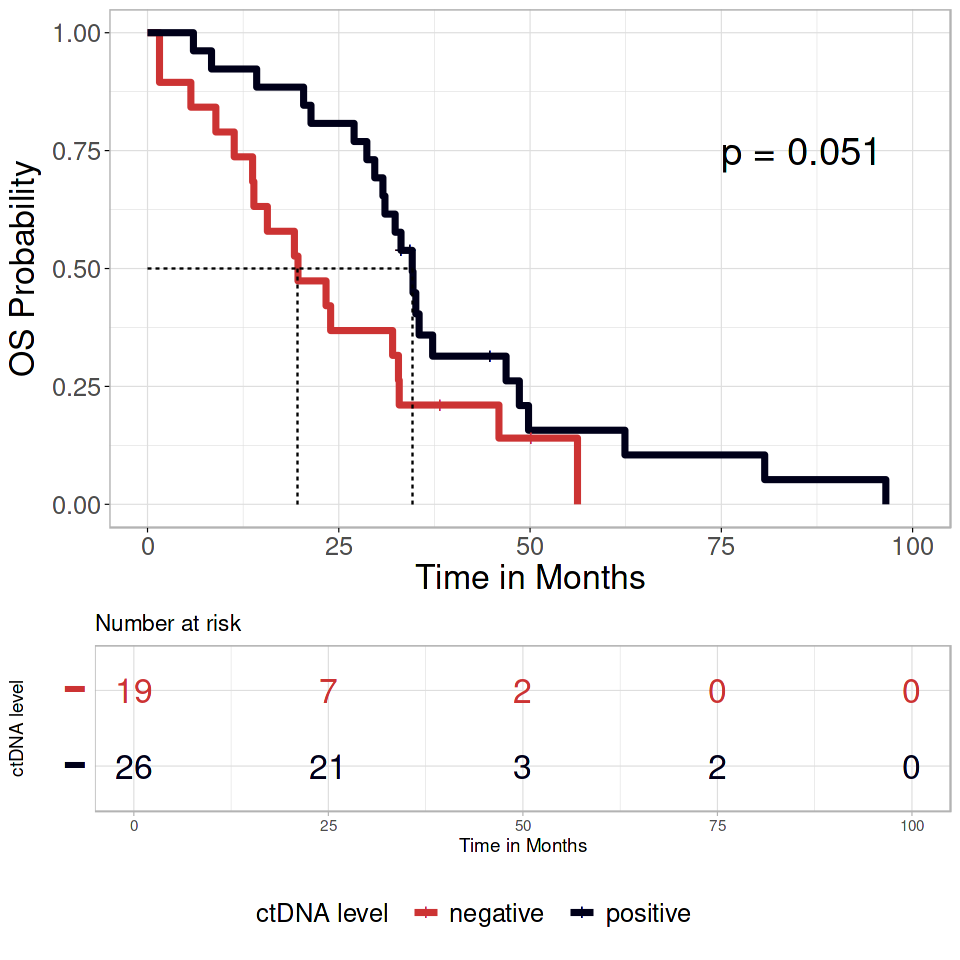

In [73]:
options(repr.plot.width=8, repr.plot.height=8)
nact_os_km

### Figure 5b: survival analysis with cox regression - NACT patients

In [74]:
dat <- surv_df1 |> 
  mutate(prev_cancer = ifelse(is.na(prev_cancer), 'no', tolower(prev_cancer))) |>
  filter(!is.na(HRD)) |>
  mutate(HRD=as.factor(HRD),
         `bmi group`=as.factor(bmi_gr),
         `age group`=as.factor(age_gr),
         operable = as.factor(ifelse(residual_ids!='no_surgery', 'yes', 'no')),
         stage = as.factor(stage),
         `ctDNA level` = as.factor(ctdna_pheno))

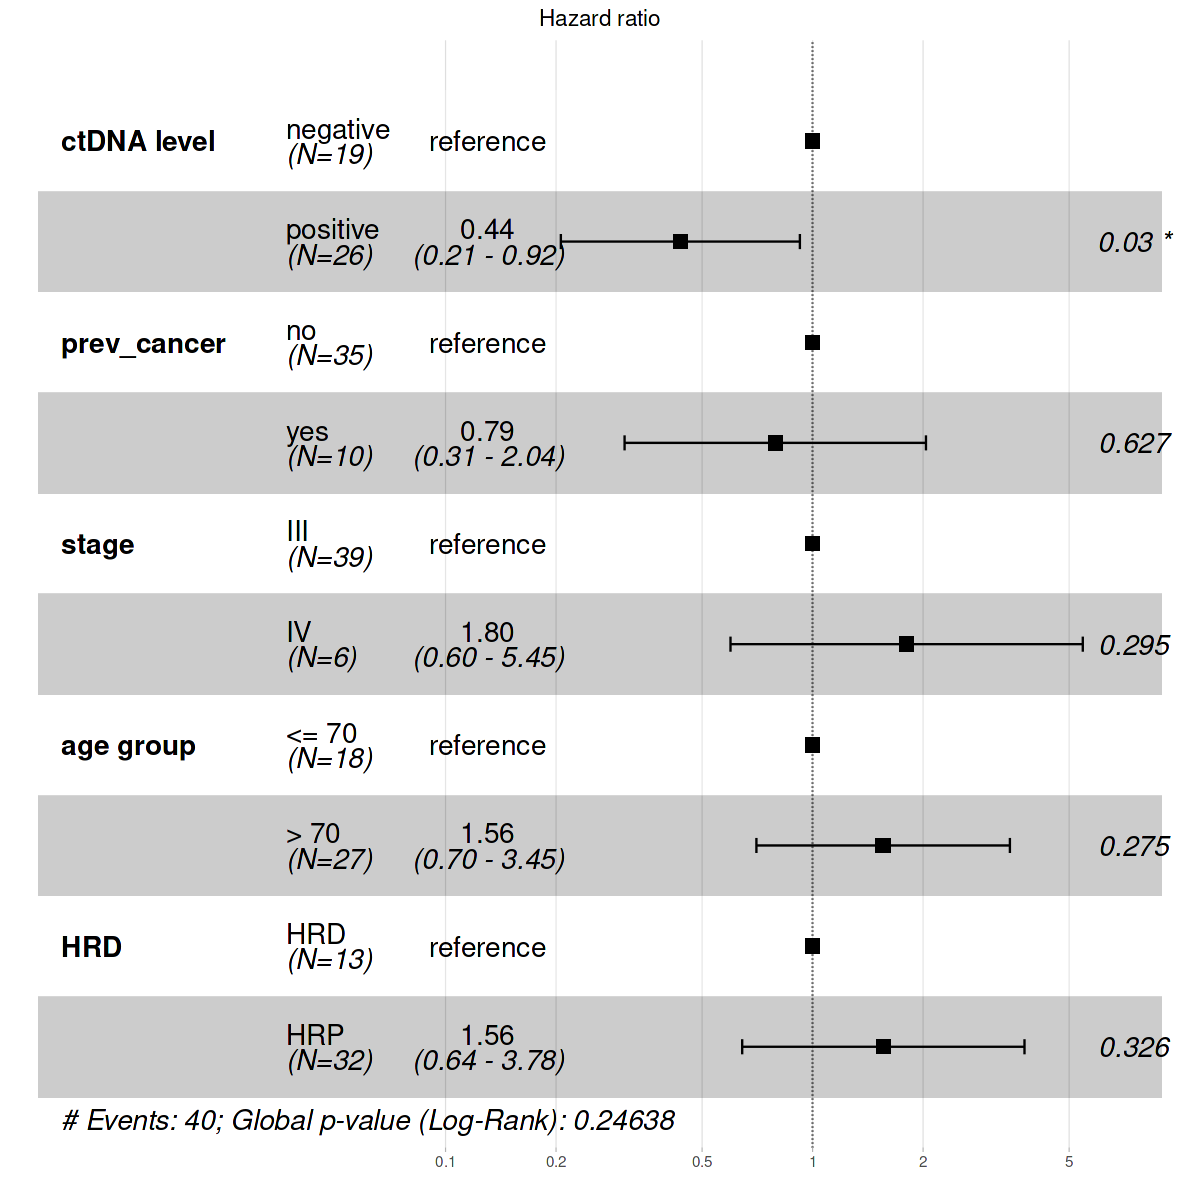

In [89]:
options(repr.plot.width=10, repr.plot.height=10)
coxph1 <- coxph(Surv(OS, died) ~ `ctDNA level` + 
                  #operable +
                  prev_cancer +
                  stage +
                  `age group` +
                  #`bmi group` +
                  HRD ,data = dat )
ggforest(coxph1, data = dat , fontsize = 1.5)

### Survival analysis with progression free interval (PFI)

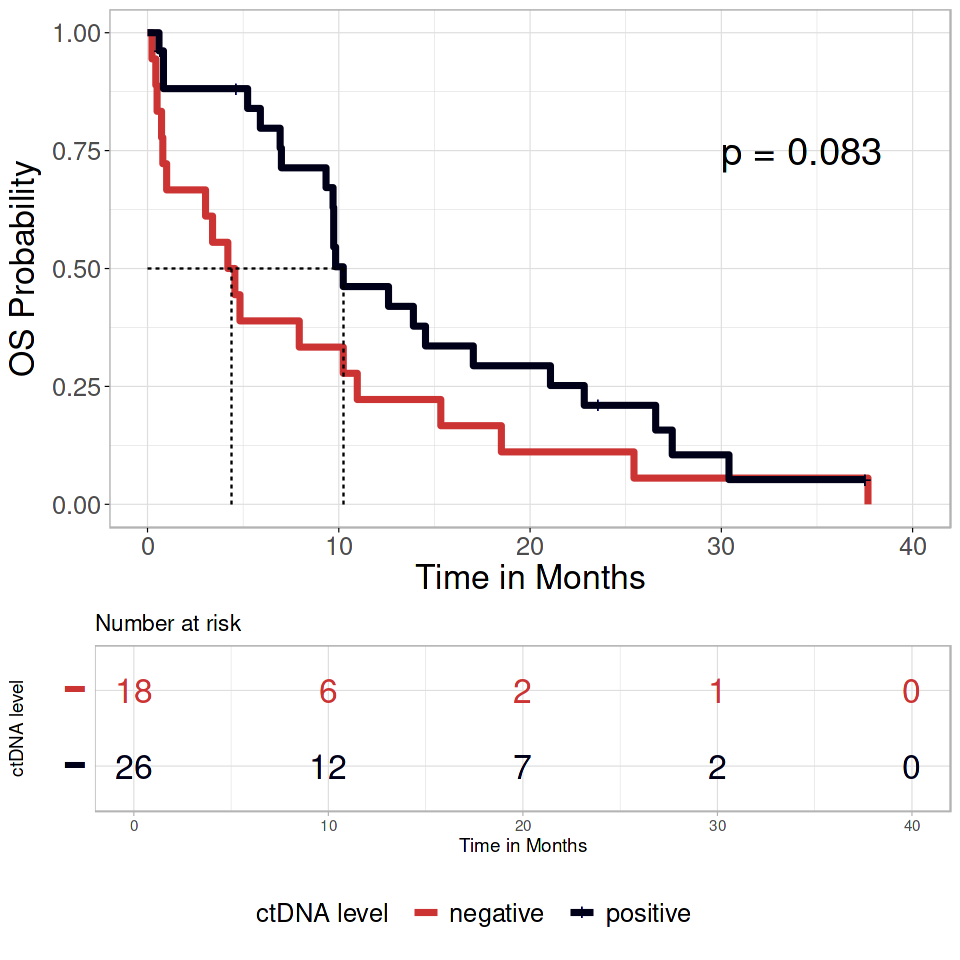

In [91]:
## NACT patient

# survival analysis - KM
pfi_object <- Surv(time = surv_df1$PFI/30, event = surv_df1$recurred)
res1 <- survfit(pfi_object ~ ctdna_pheno, data = surv_df1)
ggsurvplot(res1, data = surv_df1, pval = TRUE, pval.size = 8,
            pval.coord = c(30, .75), surv.median.line = "hv",
            # Change legends: title & labels
            #title = "NACT patients"
            legend.title = "ctDNA level",
            conf.int = F, 
            legend.labs = c("negative", "positive"),
            legend = "bottom",
            risk.table = T, size = 1.5,
            tables.height = 0.3, 
            tables.y.text = FALSE, 
            #tables.theme = theme_cleantable(),
            ggtheme = theme_light(),
            ylab='OS Probability', xlab='Time in Months', 
            risk.table.col = "strata",
            palette = c("#cc3333", "#000019"), show.legend=T,
            #size of axis text
            font.x = c(20), font.y = c(20), font.tickslab = c(15), font.legend = c(15),
            # legend size
            legend.title.size = 15, legend.text.size = 15,
            # size of values in risk table
            risk.table.fontsize = 20 / .pt) 


### Survival analysis for PDS patients

In [65]:
surv_df2 <- ctdna_cohort %>%
    filter(treatment == 'PDS') 

# survival analysis - KM
surv_object2 <- Surv(time = surv_df2$OS/30, event = surv_df2$died)
fit2 <- survfit(surv_object2 ~ ctdna_pheno, data = surv_df2)
pds_os_km <- ggsurvplot(fit2, data = surv_df2, pval = TRUE, pval.size = 8,
                    pval.coord = c(75, .75), surv.median.line = "hv",
                    #title = 'ctDNA levels in NACT Patients',
                    # Change legends: title & labels
                    legend.title = "ctDNA level",
                    conf.int = F, 
                    legend.labs = c("negative", "positive"),
                    legend = "bottom",
                    risk.table = T, size = 1.5,
                    tables.height = 0.3, 
                    tables.y.text = FALSE, 
                    #tables.theme = theme_cleantable(),
                    ggtheme = theme_light(),
                    ylab='OS Probability', xlab='Time in Months', 
                    risk.table.col = "strata",
                    palette = c("#cc3333", "#000019"), show.legend=T,
                    #size of axis text
                    font.x = c(20), font.y = c(20), font.tickslab = c(15), font.legend = c(15),
                    # legend size
                    legend.title.size = 15, legend.text.size = 15,
                    # size of values in risk table
                    risk.table.fontsize = 20 / .pt
                  ) 


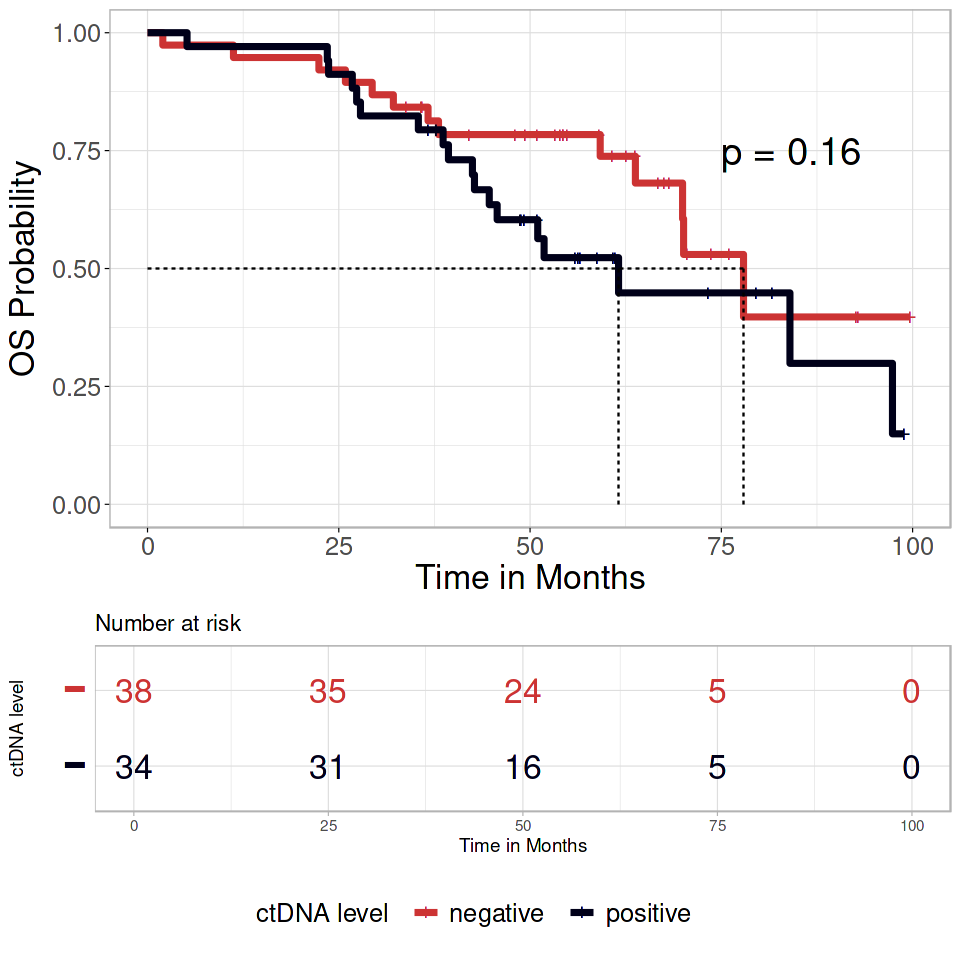

In [90]:
options(repr.plot.width=8, repr.plot.height=8)
pds_os_km

#### Survival Analysis Based on 3 Groups

In [68]:
## NACT patient

# survival analysis - KM
surv_df1 <- surv_df1 %>%
  mutate(ctdna_lev = ifelse(TF > 0.065, "high",
                        ifelse(TF > 0.01417, "med", "low")))
surv_df1$ctdna_lev <- factor(surv_df1$ctdna_lev, levels = c("low", "med", "high"))
pfi_object <- Surv(time = surv_df1$PFI/30, event = surv_df1$recurred)
res1 <- survfit(pfi_object ~ ctdna_lev, data = surv_df1)
ggsurvplot(res1, data = surv_df1, pval = TRUE, pval.size = 8,
          pval.coord = c(30, .75), surv.median.line = "hv",
          # Change legends: title & labels
          #title = "NACT patients"
          legend.title = "ctDNA level",
          conf.int = F, 
          legend.labs = c("low", "med", "high"),
          legend = "bottom",
          risk.table = T, size = 1.5,
          tables.height = 0.3, 
          tables.y.text = FALSE, 
          #tables.theme = theme_cleantable(),
          ggtheme = theme_light(),
          ylab='PFI Probability', xlab='Time in Months', 
          risk.table.col = "strata",
          palette = list_color, 
          show.legend=T,
          #size of axis text
          font.x = c(20), font.y = c(20), font.tickslab = c(15), font.legend = c(15),
          # legend size
          legend.title.size = 15, legend.text.size = 15,
          # size of values in risk table
          risk.table.fontsize = 20 / .pt) 


ERROR: Error in mutate(., ctdna_lev = ifelse(TF > 0.065, "high", ifelse(TF > : object 'surv_df1' not found
